# irisデータにXGBoostを実施して、Speciesの分類を行う

In [2]:
# pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
#ライブラリ
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics
import sklearn.preprocessing

In [8]:
# irisデータを読み込む
iris = pd.read_csv('s3://sagemaker-ap-northeast-1-237716927536/sample_data/iris.csv')
iris.columns

X = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']].values# 特徴量
y = iris[ 'Species' ].values # 目的変数

# yの値を数値に変換するための辞書を作成
label_dict = {'setosa': 0, 'versicolor': 1, 'virginica': 2}

# yの値を辞書に従って置き換える
y = np.array([label_dict[label] for label in y])

# データを学習用と評価用に8:2で分割する
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
# XGBoostのパラメータ設定（多クラス分類）
params = {
    'objective': 'multi:softmax', # 多クラス分類の目的関数
    'num_class': 3, # クラス数
}

# パラメータチューニング用のグリッドを作成（探索範囲は適宜変更してください）
grid = {
    'max_depth': [3, 4, 5], # 決定木の深さ
    'eta': [0.1, 0.01], # 学習率
}

In [10]:
# グリッドサーチを行うためのモデルを作成（評価指標は正解率とします）
model = sklearn.model_selection.GridSearchCV(xgb.XGBClassifier(**params), grid, scoring='accuracy', cv=5)

# モデルの学習と予測（グリッドサーチにより最適なパラメータが自動的に選ばれます）
model.fit(X_train, y_train) # 学習

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


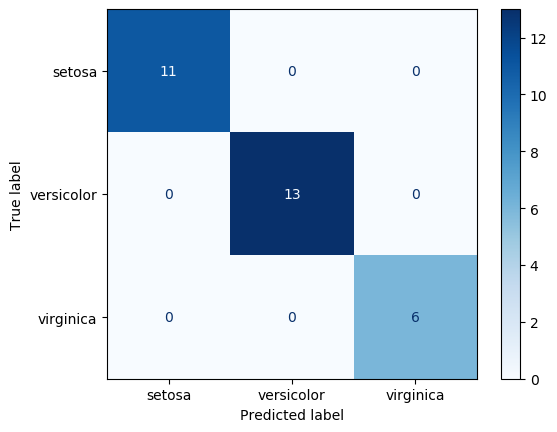

In [12]:
y_pred = model.predict(X_test) # 予測

# 混同行列を計算
cm = sklearn.metrics.confusion_matrix(y_test, y_pred)
print(cm)

# 混同行列を表示
# disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_dict)

disp.plot(cmap='Blues')
plt.show()  # プロットを表示